In [161]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import animation

%matplotlib notebook
NUM_NEIGHB =99
def get_site(coord, L):
    return coord[0]*L+coord[1]


def get_coord(site, L):
    x = site // L
    y = site % L
    return [x, y]


def get_neighbors(site, L,R):
    neighb = set()
    x, y = get_coord(site, L)
    for i in range(-round(R)-1, round(R)+2):
        for j in range(-round(R)-1, round(R)+2):
            x1 = (x + i)
            y1 = (y + j)
            if (x-x1)**2 + (y-y1)**2 <= R**2 :
                x1=x1%L
                y1=y1%L
                neighb.add(get_site([x1, y1], L))
    
    return list(neighb)
    
def tabulate_neighbors(L,R):
    Nsite = L**2
    NUM_NEIGHB= len(get_neighbors(0,L,R))
    print (NUM_NEIGHB)
    neighb = np.empty((Nsite, NUM_NEIGHB), dtype=int)
    for site in range(Nsite):
        neighb[site, :] = get_neighbors(site, L,R)
    return neighb




In [162]:

L=100
R=3
N=tabulate_neighbors(L,R)


29


In [163]:
get_neighbors(0,L,R)

[0,
 1,
 2,
 3,
 9998,
 9999,
 9898,
 9899,
 9900,
 9901,
 9902,
 298,
 299,
 300,
 198,
 199,
 9800,
 9801,
 9802,
 200,
 201,
 202,
 97,
 98,
 99,
 9700,
 100,
 101,
 102]

In [164]:
N[0]

array([   0,    1,    2,    3, 9998, 9999, 9898, 9899, 9900, 9901, 9902,
        298,  299,  300,  198,  199, 9800, 9801, 9802,  200,  201,  202,
         97,   98,   99, 9700,  100,  101,  102])

In [165]:
def evolve2(field, neighbors, b, num_steps=1):
    
    L = field.shape[0]
    
    field = field.flatten()
    SIZE = len(field)
    current = np.zeros((SIZE), dtype=int)
    scores = np.zeros((SIZE), dtype=float)
    for step in range(num_steps):
        current = field.copy()
        scores = np.zeros((SIZE), dtype=float)
        for site in range(SIZE):
            for site1 in neighbors[site]:
                scores[site] += (1 - field[site1])
                
            if field[site] == 1:
                scores[site] *= b
                
        for site in range(SIZE):
            best_site = site
            for site1 in neighbors[site]:
                if (scores[best_site] < scores[site1]):
                    best_site = site1
                    
            field[site] = current[best_site]
    return np.reshape(field, (L,L))

In [166]:
rndm = np.random.RandomState(12345)
field = (rndm.uniform(size=(L,L)) > 0.5).astype(int)
field

array([[1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]])

In [167]:
field=evolve2(field,N,3,100)
field.sum()/(L**2)


KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
im = plt.imshow(field,  cmap=plt.get_cmap('Paired'))

In [152]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [168]:
%%cython -a

import numpy as np

import cython

@cython.cdivision(True)
@cython.boundscheck(False)
@cython.wraparound(False)
def evolve2_1(grid_orig, long[:, :] neighbors, double b, int num_steps=1):
    cdef int L = grid_orig.shape[0]
    cdef int N_NEIGHB=len(neighbors[0])
    cdef short[:] grid = grid_orig.flatten()
    
    cdef int SIZE, step, site, site1, best_site, i
    SIZE = L*L
    cdef short[:] current = grid.copy()
    cdef double[:] _zeros = np.zeros((SIZE), dtype=float)
    cdef double[:] scores = np.zeros((SIZE), dtype=float)
    
    for step in range(num_steps):
        current = grid.copy()
        scores[...] = _zeros
        for site in range(SIZE):
            for i in range(N_NEIGHB):
                site1 = neighbors[site,i]
                scores[site] += (1 - grid[site1])
                
            if grid[site] == 1:
                scores[site] *= b
        
        for site in range(SIZE):
            best_site = site
            for i in range(N_NEIGHB):
                site1 = neighbors[site,i]
                if (scores[best_site] < scores[site1]):
                    best_site = site1
                    
            grid[site] = current[best_site]
    grid_orig = np.array(grid)
    return np.reshape(grid_orig, (L,L))

In [154]:
B = set()
for c1 in range(30):
    for c2 in range(1, 30):
        if c1/c2 > 1 and c1 / c2 < 3:
            B.add((c1/c2) + 0.000000001)
B = sorted(list(B))
A=[]
rndm = np.random.RandomState(12345)
for b in B:
    A.append([])
    field = (rndm.uniform(size=(L,L)) > 0.5).astype("int16")
    for i in range(400):
        field=evolve2_1(field,N,b,5)
        A[-1].append(field.sum()/(L**2))
        print(field.sum()/(L**2))
        

0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049
0.0452
0.049

0.0416
0.0369
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236
0.0302
0.0236

0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422
0.0394
0.0422

0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323
0.0285
0.0323

0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216
0.0328
0.0216

0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548
0.0622
0.0548

0.1029
0.0517
0.0452
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473
0.0512
0.0492
0.0513
0.0473

0.0748
0.063
0.0762
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768
0.0625
0.0768


0.0477
0.0456
0.0477
0.0456
0.0477
0.0456
0.0477
0.0456
0.0477
0.0456
0.0477
0.0456
0.0477
0.0456
0.0477
0.0456
0.1849
0.0482
0.0537
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533
0.0491
0.0533

0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.1081
0.0739
0.2944
0.0837
0.0697
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739
0.0678
0.0739

0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.0885
0.0632
0.4934
0.0956
0.0632
0.0846
0.0558
0.0871
0.0549
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817
0.0548
0.0817

0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.0462
0.0753
0.4949
0.0853
0.0775
0.0614
0.0739
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0.0606
0.0806
0.0608
0.08
0

0.0731
0.0592
0.0731
0.0592
0.0731
0.0592
0.0731
0.0592
0.0731
0.0592
0.0731
0.0592
0.0731
0.0592
0.0731
0.0592
0.0731
0.0592
0.0731
0.5994
0.1138
0.1038
0.0923
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.1029
0.0927
0.103
0.0916
0.

0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.0872
0.0774
0.7948
0.2072
0.0874
0.0576
0.0929
0.0529
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911
0.0524
0.0912
0.0535
0.0911

0.056
0.0843
0.0552
0.0848
0.0562
0.0844
0.0559
0.0845
0.0553
0.0846
0.0561
0.0846
0.056
0.0843
0.0552
0.0848
0.0562
0.0844
0.0559
0.0845
0.0553
0.0846
0.0561
0.0846
0.056
0.0843
0.0552
0.0848
0.0562
0.0844
0.0559
0.0845
0.0553
0.9838
0.8511
0.537
0.2061
0.0826
0.0395
0.0789
0.0371
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0788
0.0393
0.0799
0.0385
0.0

0.0646
0.0734
0.0638
0.0756
0.0642
0.0738
0.0638
0.0742
0.0646
0.0734
0.0638
0.0756
0.0642
0.0738
0.0638
0.0742
0.0646
0.0734
0.0638
0.0756
0.0642
0.0738
0.0638
0.0742
0.0646
0.0734
0.0638
0.0756
0.0642
0.0738
0.0638
0.0742
0.0646
0.0734
0.0638
0.0756
0.0642
0.0738
0.0638
0.0742
0.0646
0.0734
0.0638
0.0756
0.0642
0.0738
0.0638
0.0742
0.0646
0.0734
0.0638
0.0756
0.0642
0.0738
0.0638
0.9863
0.86
0.4413
0.1167
0.0757
0.0509
0.0748
0.0535
0.0775
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.0805
0.046
0.

0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616
0.0267
0.0612
0.0276
0.0616

0.0449
0.0358
0.0451
0.0357
0.0451
0.0358
0.0455
0.0357
0.045
0.0359
0.0449
0.0359
0.045
0.0363
0.0449
0.0358
0.0451
0.0357
0.0451
0.0358
0.0455
0.0357
0.045
0.0359
0.0449
0.0359
0.045
0.0363
0.0449
0.0358
0.0451
0.0357
0.0451
0.0358
0.0455
0.0357
0.045
0.0359
0.0449
0.0359
0.045
0.0363
0.0449
0.0358
0.0451
0.0357
0.0451
0.0358
0.0455
0.0357
0.045
0.0359
0.0449
0.0359
0.045
0.0363
0.0449
0.0358
0.0451
0.0357
0.0451
0.0358
0.0455
0.0357
0.045
0.0359
0.0449
0.0359
0.045
0.0363
0.0449
0.0358
0.0451
0.0357
0.0451
0.0358
0.0455
0.0357
0.045
0.0359
0.0449
0.0359
0.045
0.0363
0.0449
0.0358
0.0451
0.0357
0.0451
0.0358
0.0455
0.0357
0.045
0.0359
0.0449
0.0359
0.045
0.0363
0.0449
0.0358
0.0451
0.0357
0.0451
0.0358
0.0455
0.0357
0.045
0.9977
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9583
0.8257
0.5896
0.273
0.0826
0.043
0.0454
0.0578
0.0237
0.0515
0.0199
0.0384
0.0191
0.0376
0.0209
0.0329
0.0192
0.0299
0.017
0.0357
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0.0184
0.0361
0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


<IPython.core.display.Javascript object>


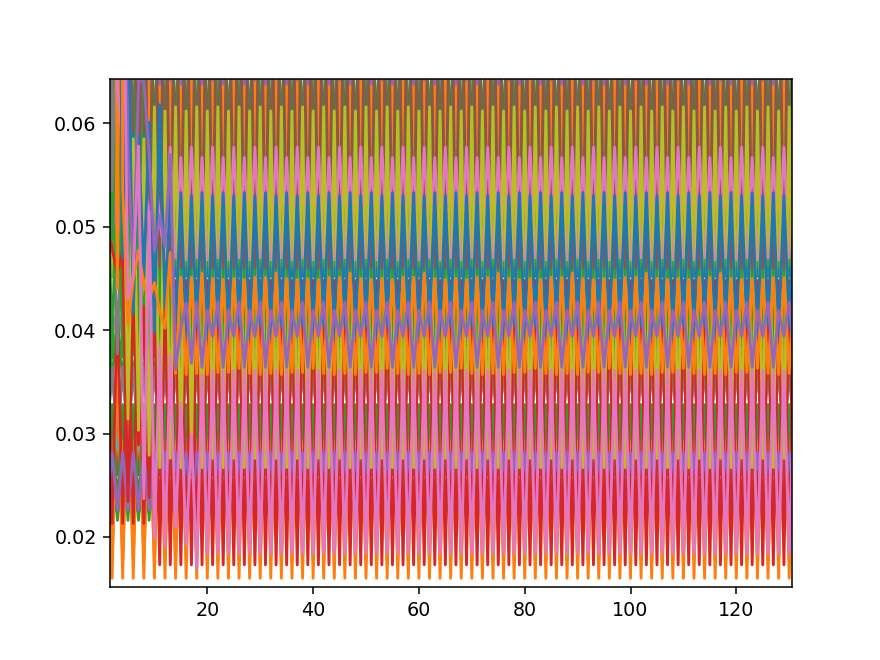

In [155]:
%matplotlib notebook
for i in range(len(B)):
    plt.plot( range(len(A[i])),A[i])
    plt.show()

<IPython.core.display.Javascript object>


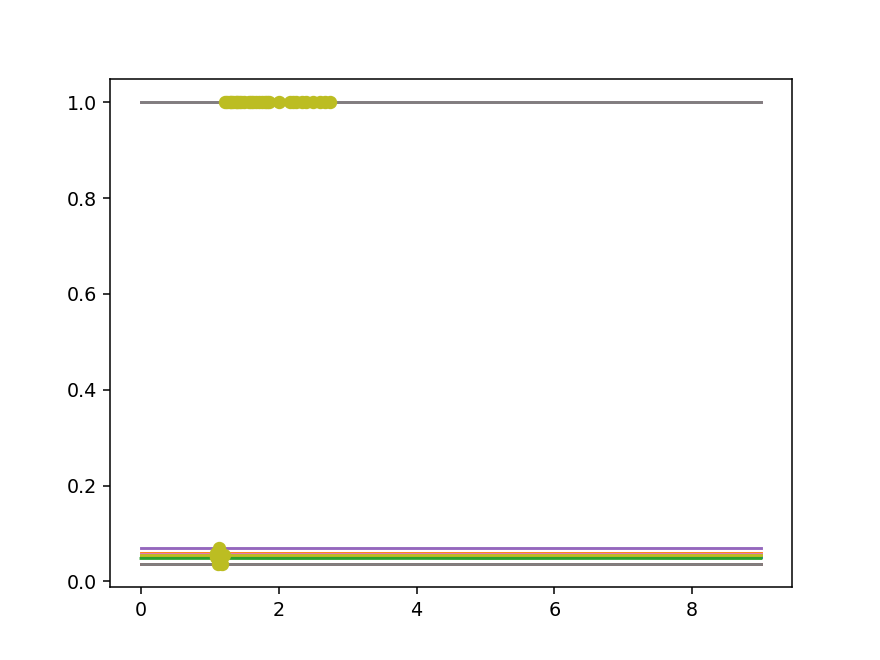

In [156]:
 %matplotlib notebook
B = set()
for c1 in range(14):
    for c2 in range(1, 14):
        if c1/c2 > 1 and c1 / c2 < 3:
            B.add((c1/c2) + 0.000000001)
B = sorted(list(B))
A=[]
rndm = np.random.RandomState(12345)
for b in B:
    A.append([])
    field = (rndm.uniform(size=(L,L)) > 0.5).astype("int16")
    for i in range(10):
        field=evolve2_1(field,N,b,100)
        A[-1].append(field.sum()/(L**2))
for i in range(len(B)):
    plt.plot( range(len(A[i])),A[i])
    plt.show()
     


In [158]:
summ=0
M=[0]*len(B)
for i in range(len(B)):
    summ=0
    M[i]=0
    for c in range(2,8):
        summ=summ+A[i][c]
    M[i]=summ/6
    print(M[i])

0.0506
0.05909999999999999
0.0479
0.0357
0.0702
0.054200000000000005
0.05820000000000001
0.0361
0.056
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [117]:
len(B)

38

<IPython.core.display.Javascript object>


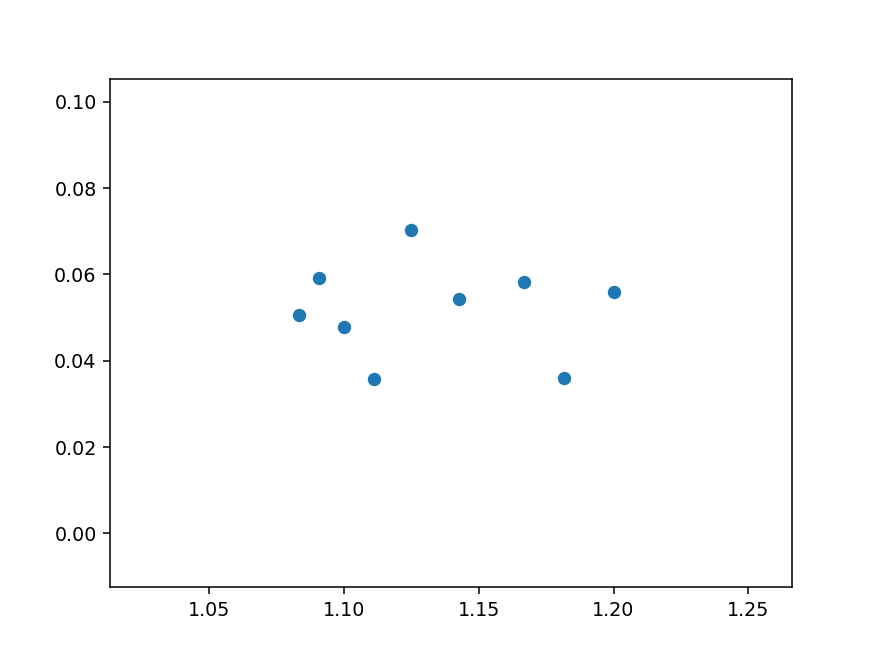

<function matplotlib.pyplot.show(*args, **kw)>

In [160]:
plt.plot(B,M,'o')
plt.show